In [40]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPool2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, Flatten
from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
#from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

In [41]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'dataset/'
width=256
height=256
depth=3

In [42]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
            image = cv2.resize(image, (50,50))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [43]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:2000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".PNG") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing vit A ...
[INFO] Processing vit B ...
[INFO] Processing vit C ...
[INFO] Processing vit D ...
[INFO] Processing vit E ...
[INFO] Image loading completed


In [44]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
print(image_labels)

['vit A' 'vit B' 'vit C' 'vit D' 'vit E']
[INFO] Spliting data to train, test
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


1084 train samples
271 test samples
Label: [[0 0 0 0 1]]


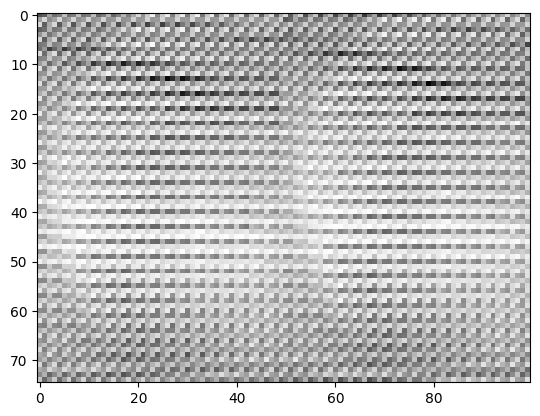

In [45]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train /= 255
#x_test /= 255

#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)

print("Label:",y_train[255:256])
plt.imshow(x_train[255:256].reshape(75,100), cmap='gray')
plt.show()

In [46]:
first_layer_size = 32
model = Sequential()
inputShape = (50, 50, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=inputShape))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\dhira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     5,185,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,243,701 (20.00 MB)

 Trainable params: 5,243,701 (20.00 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(),metrics=["accuracy"])
# train the network
print("[INFO] training network...")



#history = model.fit_generator(
#    aug.flow(x_train, y_train, batch_size=BS),
#    validation_data=(x_test, y_test),
#    steps_per_epoch=len(x_train) // BS,
#    epochs=EPOCHS, verbose=1
#    )
history = model.fit(x_train,y_train,validation_split=0.25,
                    batch_size=BS,
                    epochs=EPOCHS,validation_data=(x_test, y_test),
                    verbose=1)

c:\Users\dhira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


[INFO] training network...
Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.2471 - loss: 2.0861 - val_accuracy: 0.4760 - val_loss: 1.4061
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4160 - loss: 1.4271 - val_accuracy: 0.4317 - val_loss: 1.2576
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.4334 - loss: 1.2744 - val_accuracy: 0.5609 - val_loss: 1.0614
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5648 - loss: 1.2237 - val_accuracy: 0.5756 - val_loss: 1.0394
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5956 - loss: 0.9722 - val_accuracy: 0.1734 - val_loss: 2.7988
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5471 - loss: 1.1778 - val_accuracy: 0.4686 - val_loss: 2.0221
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5498 - loss: 1.1612 - val_accuracy: 0.6753 - val_loss: 0.8412
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6937 - loss: 0.8285

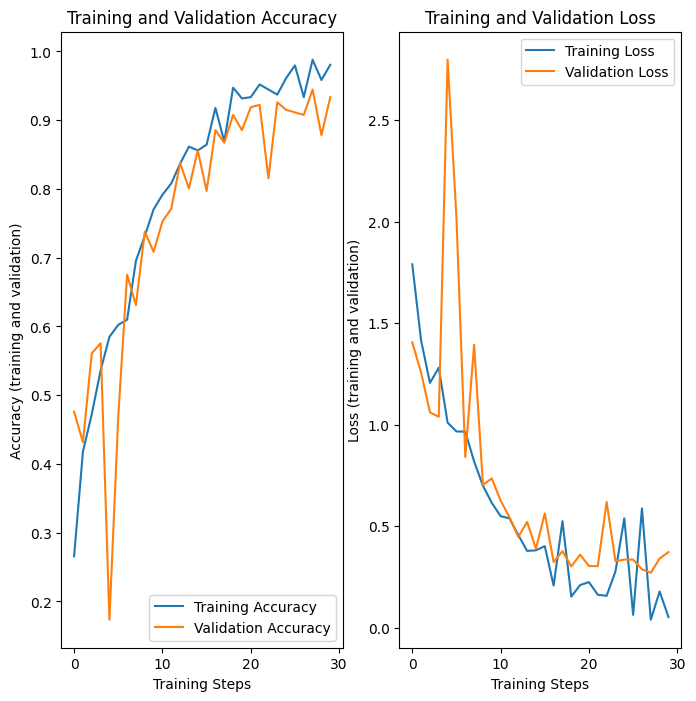

In [49]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('graph_accuracy_graph.png',dpi=400)
plt.show()

In [50]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [51]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9111 - loss: 0.5017
Test Accuracy: 93.35793256759644


In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3730534315109253
Test accuracy: 0.9335793256759644


In [53]:
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Prediction
 [7.4484817e-08 1.2040902e-02 2.8745459e-05 9.8788935e-01 4.0887855e-05]

Thresholded output
 [0 0 0 1 0]


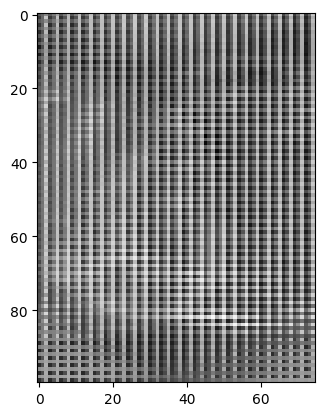

In [54]:
plt.imshow(x_test[23:24].reshape(100,75),cmap='gray')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "blue")
    fig.tight_layout()
    return ax

In [56]:
np.set_printoptions(precision=2)

In [57]:
prediction = model.predict(x_test, batch_size=10, verbose=0)
rounded_prediction = model.predict(x_test, batch_size=10, verbose=0)
#y_pred=np.argmax(y_pred, axis=1)

In [58]:
for i in rounded_prediction:
    print(i)

[1.00e+00 2.63e-10 9.91e-08 3.73e-04 9.60e-09]
[1.22e-06 9.19e-07 6.53e-06 3.14e-05 1.00e+00]
[6.59e-12 2.30e-05 5.86e-05 1.00e+00 1.23e-09]
[2.53e-10 3.08e-11 6.65e-07 1.38e-05 1.00e+00]
[9.02e-05 2.70e-02 1.40e-03 9.71e-01 5.61e-05]
[0.   0.3  0.15 0.54 0.  ]
[1.00e+00 9.84e-17 9.97e-13 1.86e-06 1.85e-15]
[3.12e-06 9.07e-03 8.57e-05 9.90e-01 6.11e-04]
[3.47e-09 3.12e-04 1.00e+00 2.78e-05 2.93e-07]
[2.53e-04 2.66e-10 1.00e+00 1.49e-05 2.47e-09]
[1.00e+00 1.17e-08 1.26e-07 1.03e-08 4.16e-15]
[2.23e-07 9.98e-01 1.89e-03 1.12e-04 1.42e-04]
[2.98e-06 8.02e-01 9.53e-03 1.88e-01 1.69e-04]
[2.47e-09 1.00e+00 2.33e-07 1.27e-05 1.15e-06]
[1.81e-06 9.26e-01 1.51e-05 7.36e-02 2.37e-05]
[7.36e-04 2.64e-02 1.88e-03 9.70e-01 7.68e-04]
[9.73e-10 9.94e-01 2.89e-04 5.52e-03 5.33e-05]
[9.58e-06 9.44e-01 6.08e-04 5.54e-02 2.72e-04]
[7.53e-06 6.09e-04 9.96e-01 2.94e-03 8.60e-04]
[1.00e+00 3.71e-19 1.33e-12 3.05e-08 1.07e-12]
[2.16e-04 3.65e-01 2.98e-03 6.22e-01 1.01e-02]
[5.31e-11 2.32e-11 1.00e+00 4.86e

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

# y_pred = model.predict(x_test)
# print(y_pred)

# p=model.predict(x_test) # to predict probability
# p=np.argmax(predict,axis=1)
# target_names = ['class 0(BIKES)', 'class 1(CARS)', 'class 2(HORSES)']
print(label_binarizer.classes_)
target_names = label_binarizer.classes_
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.00e+00 2.63e-10 9.91e-08 3.73e-04 9.60e-09]
 [1.22e-06 9.19e-07 6.53e-06 3.14e-05 1.00e+00]
 [6.59e-12 2.30e-05 5.86e-05 1.00e+00 1.23e-09]
 ...
 [7.95e-11 6.63e-10 8.30e-10 3.69e-06 1.00e+00]
 [1.78e-11 1.26e-08 1.92e-09 1.33e-05 1.00e+00]
 [8.06e-11 2.62e-03 3.05e-07 9.97e-01 4.79e-10]]
[0 4 3 4 3 3 0 3 2 2 0 1 1 1 1 3 1 1 2 0 3 2 4 3 0 1 1 3 0 2 0 0 4 4 3 2 3
 2 4 0 0 3 3 3 1 2 0 0 2 4 0 2 1 0 4 4 0 4 4 1 4 1 1 1 2 0 2 0 4 1 0 1 0 2
 4 0 4 2 1 2 1 4 1 3 4 0 1 0 4 0 0 0 4 1 1 3 0 4 3 0 0 0 1 1 3 2 4 3 4 4 2
 0 3 0 2 4 3 3 4 3 1 0 1 2 0 3 4 2 4 0 0 3 2 1 3 1 1 3 4 0 0 4 4 0 1 4 3 1
 4 4 4 3 3 2 2 2 1 0 2 4 4 4 2 3 4 0 3 1 4 1 2 2 2 3 0 2 0 3 4 4 4 2 0 0 4
 2 3 0 4 2 4 3 1 0 4 1 1 4 0 1 2 0 4 2 1 3 3 1 3 0 1 4 3 4 0 1 0 1 0 1 4 4
 2 0 0 0 4 2 1 4 3 4 4 3 1 3 3 0 1 0 0 0 4 2 0 4 2 3 4 0 0 3 0 4 2 1 0 2 4
 4 1 2 1 3 0 1 2 3 4 4 3]
['vit A' 'vit B' 'vit C' 'vit D' 'vit E']
              precision    recall  f1-score   support

       vit A       1

Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.   0.93 0.   0.07 0.  ]
 [0.   0.   0.86 0.14 0.  ]
 [0.   0.02 0.11 0.83 0.04]
 [0.   0.   0.   0.   1.  ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

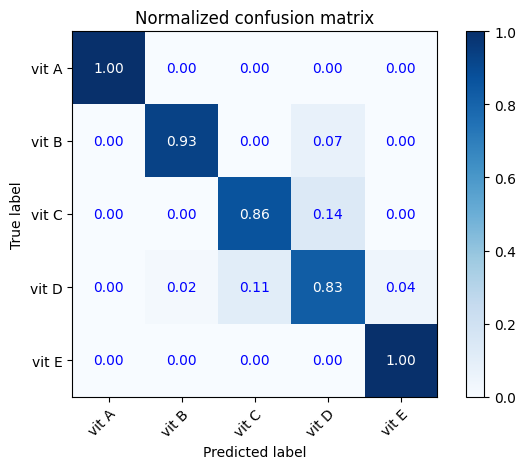

In [60]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_, normalize=True, title='Normalized confusion matrix')

Confusion matrix, without normalization
[[65  0  0  0  0]
 [ 0 50  0  4  0]
 [ 0  0 38  6  0]
 [ 0  1  5 38  2]
 [ 0  0  0  0 62]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

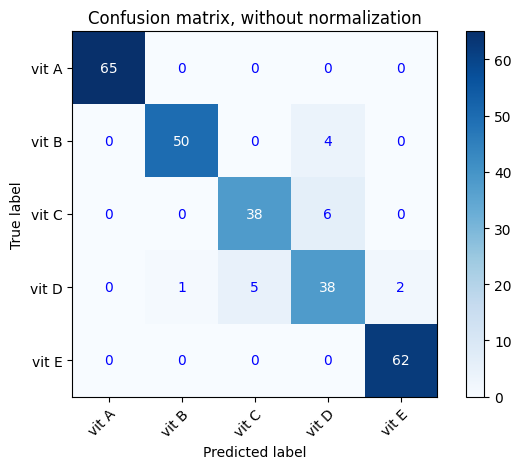

In [61]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_,
                      title='Confusion matrix, without normalization')

In [62]:
model.save('grape.h5')

In [63]:
import tensorflow as tf

model = tf.keras.models.load_model('grape.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_grape.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\dhira\AppData\Local\Temp\tmpa5ilgczi\assets


INFO:tensorflow:Assets written to: C:\Users\dhira\AppData\Local\Temp\tmpa5ilgczi\assets


Saved artifact at 'C:\Users\dhira\AppData\Local\Temp\tmpa5ilgczi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2202753047760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753050064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753048336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753046608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753050640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753056016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753054288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2202753046416: TensorSpec(shape=(), dtype=tf.resource, name=None)


20978196

<>:52: SyntaxWarning: invalid escape sequence '\W'
<>:52: SyntaxWarning: invalid escape sequence '\W'
C:\Users\dhira\AppData\Local\Temp\ipykernel_11428\2661714730.py:52: SyntaxWarning: invalid escape sequence '\W'
  test_image_path = "E:\Work\Intro to DS\Project\\vitamin\main\dataset\\vitamins\\vit D\\21.PNG"  # Replace with the test image path


Predicted Class: vit D
Raw Predictions: [[3.77e-09 1.54e-03 2.63e-05 9.98e-01 1.61e-08]]


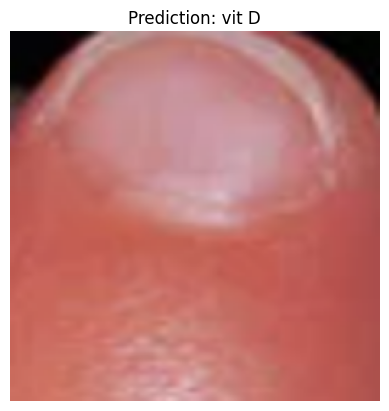

In [73]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle

# Load the label binarizer to decode predictions
label_binarizer = pickle.load(open("label_transform.pkl", "rb"))

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="model_grape.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (50, 50))  # Resize to (50x50)
    image = image.astype('float32') / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Predict function
def predict(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output)
    predicted_label = label_binarizer.classes_[predicted_class]
    
    print("Predicted Class:", predicted_label)
    print("Raw Predictions:", output)

    # Display the image
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predicted_label}")
    plt.axis("off")
    plt.show()

# Test with an image
test_image_path = "E:\Work\Intro to DS\Project\\vitamin\main\dataset\\vitamins\\vit D\\21.PNG"  # Replace with the test image path
predict(test_image_path)
